In [ ]:
!pip install bokeh 

In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
import bokeh.io
bokeh.io.output_notebook()
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models.tools import HoverTool

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Corals.csv to Corals.csv


In [ ]:
# Load the dataset (เปลี่ยน path ที่ดาวน์โหลดไฟล์มาเก็บไว้)
df_load= pd.read_csv('gdrive/My Drive/Corals.csv')
#df_load = pd.read_csv(r"C:\Users\Surface pro\Downloads\corals.csv")
# Preview df_load
df_load.head()

,Latitude,Longitude,Idw_pH1,Idw_WS1,Temp1_1,Class
0,9.8407,98.4268,7.6633,8.8111,29.5102,5
1,9.8222,98.4294,7.6633,8.8111,29.5105,5
2,9.7859,98.4108,7.6538,8.4209,29.5107,5
3,9.7347,98.3725,7.6466,8.1204,29.5297,5
4,9.7331,98.4366,7.6482,8.0303,29.5296,5


In [ ]:
df_load[:]

,Latitude,Longitude,Idw_pH1,Idw_WS1,Temp1_1,Class
0,9.840700,98.426800,7.66330,8.8111,29.510200,5
1,9.822200,98.429400,7.66330,8.8111,29.510500,5
2,9.785900,98.410800,7.65380,8.4209,29.510700,5
3,9.734700,98.372500,7.64660,8.1204,29.529700,5
4,9.733100,98.436600,7.64820,8.0303,29.529600,5
...,...,...,...,...,...,...
604,10.225158,100.169431,8.01306,12.0000,28.976999,2
605,10.156630,100.253188,8.01726,12.1594,29.000200,2
606,10.156630,100.367402,8.02520,12.3562,29.037800,2
607,10.156630,100.367402,8.02520,12.3562,29.037800,2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coral_test.csv to coral_test (1).csv


In [ ]:
df_test = pd.read_csv('gdrive/My Drive/coral_test.csv')
#df_test = pd.read_csv(r"C:\Users\Surface pro\Downloads\coral_test.csv")
df_load.head()

,Latitude,Longitude,Idw_pH1,Idw_WS1,Temp1_1,Class
0,9.8407,98.4268,7.6633,8.8111,29.5102,5
1,9.8222,98.4294,7.6633,8.8111,29.5105,5
2,9.7859,98.4108,7.6538,8.4209,29.5107,5
3,9.7347,98.3725,7.6466,8.1204,29.5297,5
4,9.7331,98.4366,7.6482,8.0303,29.5296,5


In [ ]:
df_test[:]

,Latitude,Longitude,Idw_pH1,Idw_WS1,Temp1_1,Class
0,9.4865,98.3838,7.6420,7.6214,29.5194,5
1,9.5135,98.3561,7.6361,7.4478,29.4927,5
2,7.8915,98.5135,7.7104,10.4350,29.8403,4
3,7.7973,98.5318,7.7063,10.1081,29.9883,3
4,8.1933,98.6111,7.6862,9.4412,29.5002,3
...,...,...,...,...,...,...
271,7.4364,99.0197,7.9602,13.6960,29.5248,3
272,7.4364,99.0197,7.9602,13.6960,29.5248,3
273,7.4234,98.8900,7.9131,12.9920,29.7274,3
274,7.4307,98.7912,7.8881,12.7080,29.7691,3


In [ ]:
# Create training data features
df_training = df_load
df_training = df_training.dropna()
X = df_training[['Latitude', 'Longitude','Idw_pH1','Idw_WS1','Temp1_1']]
y = df_training[['Class']]

In [ ]:
df_testing = df_test
df_testing = df_testing.dropna()
X_new = df_testing[['Latitude', 'Longitude','Idw_pH1','Idw_WS1','Temp1_1']]
y_new = df_testing[['Class']]

In [ ]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Use train test split to split our training data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% testing 80% training


In [ ]:
# Create a model
model_reg = DecisionTreeClassifier(criterion="entropy", max_depth=None)
# Train the model
model_reg.fit(X_train, y_train)
# Predict y_test (magnitude and depth) using X_test features (latitude and longitude)
results = model_reg.predict(X_test)
# Check the model accuracy score
score = model_reg.score(X_test, y_test) * 100
print(score)

#print(classification_report(y_test,results))

86.88524590163934


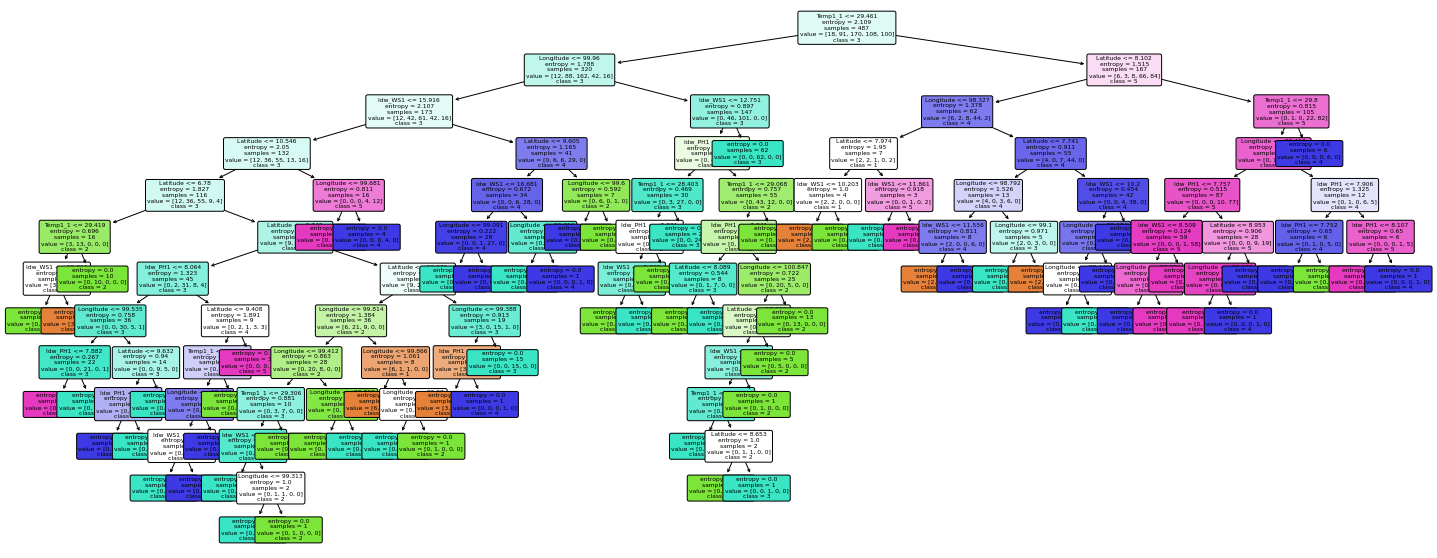

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(model_reg, 
              feature_names=['Latitude','Longitude','Idw_PH1','Idw_WS1','Temp1_1'], 
              class_names=['1','2','3','4','5'], 
              filled=True, 
              rounded=True, 
              fontsize=6)

In [ ]:
print(results)


[1 3 2 3 1 5 3 3 3 3 4 5 2 3 4 5 4 4 4 4 3 3 4 5 5 3 5 3 4 5 5 4 4 3 4 3 2
 4 4 2 2 5 1 5 2 4 1 5 5 1 5 4 4 3 3 4 5 4 5 4 2 5 3 4 4 3 2 3 5 2 2 2 3 4
 2 4 3 2 5 3 3 3 5 2 4 3 2 3 1 1 1 5 4 4 3 2 4 5 3 5 5 2 1 5 4 4 3 3 4 3 3
 4 5 4 4 5 5 3 5 5 3 5]


In [ ]:
# Improve the model accuracy by automating hyperparameter tuning
parameters = {'criterion': ["entropy","gini"]}


In [ ]:
# Create GridSearchCV model
grid_obj = GridSearchCV(model_reg, parameters)
# Train the model
grid_fit = grid_obj.fit(X_train, y_train)
# Select the best fitted model
best_fit = grid_fit.best_estimator_

In [ ]:
# Make the prediction
results = best_fit.predict(X_test)
# Check the model accuracy score
score = best_fit.score(X_test, y_test) * 100
print(score)


88.52459016393442


In [ ]:
# Predict the earthquakes for the year 2017, and validate the model accuracy using out of sample data
final_results = best_fit.predict(X_new)
# Check the model accuracy score
final_score = best_fit.score(X_new, y_new) * 100
print(final_score)

59.78260869565217


In [ ]:
# Create prediction dataset

# Store the prediction results in lists
lst_Class = []
i = 0

for r in final_results.tolist():
    lst_Class.append(final_results[i])
    i += 1

In [ ]:
# Create the prediction dataset/dataframe
df_results = X_new[['Latitude', 'Longitude','Idw_pH1','Idw_WS1','Temp1_1']]
df_results['Class'] = lst_Class


In [ ]:
df_results[:]

,Latitude,Longitude,Idw_pH1,Idw_WS1,Temp1_1,Class
0,9.4865,98.3838,7.6420,7.6214,29.5194,5
1,9.5135,98.3561,7.6361,7.4478,29.4927,5
2,7.8915,98.5135,7.7104,10.4350,29.8403,4
3,7.7973,98.5318,7.7063,10.1081,29.9883,3
4,8.1933,98.6111,7.6862,9.4412,29.5002,4
...,...,...,...,...,...,...
271,7.4364,99.0197,7.9602,13.6960,29.5248,3
272,7.4364,99.0197,7.9602,13.6960,29.5248,3
273,7.4234,98.8900,7.9131,12.9920,29.7274,3
274,7.4307,98.7912,7.8881,12.7080,29.7691,3


In [ ]:
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models.tiles import WMTSTileSource
import math
from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.tile_providers import CARTODBPOSITRON, STAMEN_TERRAIN 
from bokeh.themes import built_in_themes
from bokeh.io import curdoc
from bokeh.models import WMTSTileSource

# Create Geo Map Plot
def plotMap():
    # Show the plot embedded in jupyter notebook
    #output_notebook()
    
    lat = df_results['Latitude'].values.tolist()
    lon = df_results['Longitude'].values.tolist()
    Classes = df_results['Class'].values.tolist()
    lst_lat = []
    lst_lon = []
    lst_Classes = []
    i = 0
    
    
    # Convert lat and long values inot merc_projection
    for i in range(len(lon)):
    
        r_major = 6378137.000
        x = r_major * math.radians(lon[i])
        scale = x/lon[i]
        y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 +
            lat[i] * (math.pi/180.0)/2.0)) * scale
        
        lst_lon.append(x)
        lst_lat.append(y)
        i += 1
    
    df_results['coords_x'] = lst_lat
    df_results['coords_y'] = lst_lon
     
    
    lats = df_results['coords_x'].tolist()
    longs = df_results['coords_y'].tolist()
    lst_Classes = df_results['Class'].tolist()
    
    # Create datasource
    cds = ColumnDataSource(data=dict(
        lat=lats,
        lon=longs,
        Classes=Classes
    
    ))
    
    # Tooltip
    TOOLTIPS = [
        ("คลาส", " @Classes")
        
        
    ]
    
    # Create figure
    p = figure(title='Covid Map',
              plot_width=1000,
              plot_height=600,
              x_range=(9000000, 14000000),
              y_range=(1000000, 1400000),
              tooltips=TOOLTIPS)
    p.add_tile(get_provider(Vendors.CARTODBPOSITRON))
   
    p.circle(x='lon', y='lat', fill_color='red', fill_alpha=0.8, source=cds, legend='คลาส')
    #p.add_tile(CARTODBPOSITRON)
    
    
    
    # Style the map plot
    # Title
    p.title.align = 'center'
    p.title.text_font_size = '30pt'
    p.title.text_font = 'serif'
    
    # Legend
    p.legend.location = 'bottom_right'
    p.legend.background_fill_color='black'
    p.legend.background_fill_alpha = 0.8
    p.legend.click_policy = 'hide'
    p.legend.label_text_color = 'white'
    p.xaxis.visible=False
    p.yaxis.visible=False
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color=None
    
    show(p) 
    
    return p
    
plotMap()


Figure(id='1002', ...)